In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from IPython.display import HTML 

In [2]:
df = pd.read_csv(os.path.join(os.getcwd(), '../resources/accuracy_set.csv'), index_col=0, dtype={'input' : object, 'output': object})

drop_columns = ['Unnamed: 0', 'SynBioHub URI', 'Unnamed: 0.1', 'calibration_id', 'experiment_id', 'filename', 
                'glycerol_plate_index',  'growth_media_1', 'growth_media_2',  
                'inc_temp', 'inc_time_1', 'inc_time_2', 'input', 'lab', 'lab_id', 'media', 'od', 
                'od_cutoff', 'output', 'part_1_id', 'part_2_id', 'plate_id',  'replicate', 'source_container', 
                'strain_name', 'strain_circuit', 'well', 'post_well']
od_df = pd.read_csv(os.path.join(os.getcwd(), '../resources/tx_od.csv')).rename(columns={'strain' : 'strain_name'}).drop(columns=drop_columns)
df = df.merge(od_df, on='id', how='left')
discretization = [
          (0.0, 1e-4),
          (1e-4, 3e-4),
          (3e-4, 7e-4),
          (7e-4, 1e-3),
          (1e-3, 5.1e-3),
          (5.1e-3, 1.0)
      ]
means = [np.around(np.mean(d),5) for d in discretization]
recast = [means[i] for d in df["od"] for i,k in enumerate(discretization) if d > k[0] and d <= k[1] ]
df["od"] = recast


In [3]:
correctness_col='mean_correct_classifier_live'
conditions=['inc_time_2', 'media', 'inc_temp', 'od']
design=['gate', 'input']


# Strain x condition scores is mean of samples for condition
strain_score_df = df.groupby(conditions+design)[correctness_col].agg(np.mean).reset_index()



In [4]:
# Circuit x condition scores is product of strain for condition
circuit_score_df_prod = strain_score_df.groupby(conditions+['gate'])[correctness_col].agg(np.prod).reset_index()
HTML(circuit_score_df_prod.to_html(index=False))

inc_time_2,media,inc_temp,od,gate,mean_correct_classifier_live
8.0,SC Media,30.0,0.00005,AND,0.389394
8.0,SC Media,30.0,0.00005,NAND,0.016083
8.0,SC Media,30.0,0.00005,NOR,0.209361
8.0,SC Media,30.0,0.00005,OR,0.021336
8.0,SC Media,30.0,0.00005,XNOR,0.243931
8.0,SC Media,30.0,0.00005,XOR,0.018678
8.0,SC Media,30.0,0.00020,AND,0.307323
8.0,SC Media,30.0,0.00020,NAND,0.070468
8.0,SC Media,30.0,0.00020,NOR,0.220728
8.0,SC Media,30.0,0.00020,OR,0.006852


In [5]:
csdp = circuit_score_df_prod
def make_plot(gate):
    df_prod = csdp[(csdp["gate"]==gate)]# & (csdp["inc_time_2"]==inc)]
#     print(df_prod)
    df_prod['od_temp_inc'] = list(zip(df_prod.od, df_prod.inc_temp,df_prod.inc_time_2))
    df_prod.drop(["od","inc_temp","inc_time_2"],axis=1)
#    ax = plt.axes()
    for m in np.unique(df_prod.media.values):
        c = df_prod[df_prod["media"]==m][correctness_col].values
        plt.plot([m]*len(c),c,linestyle="",marker="o",color="k")
        plt.ylim((0,1))
    
        

/Users/b37v456/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


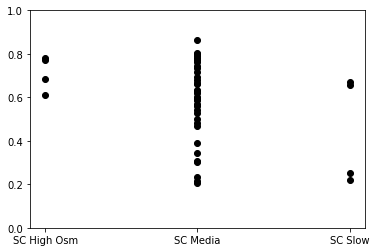

In [6]:
make_plot("AND")

/Users/b37v456/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


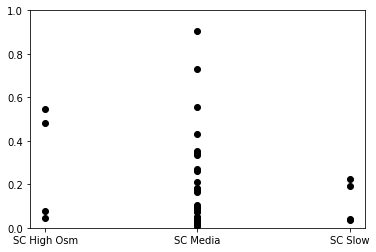

In [7]:
make_plot("NAND")

/Users/b37v456/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


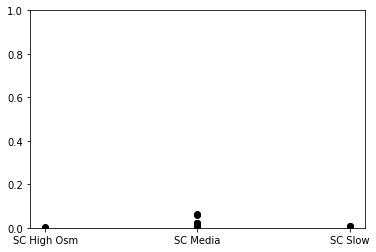

In [8]:
make_plot("OR")

/Users/b37v456/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


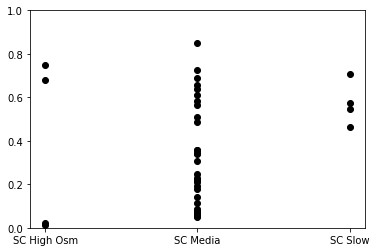

In [9]:
make_plot("NOR")

/Users/b37v456/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


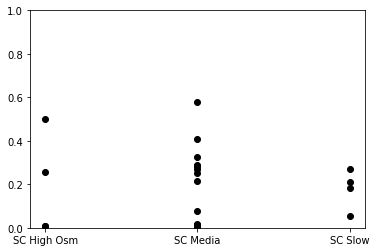

In [10]:
make_plot("XOR")

/Users/b37v456/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


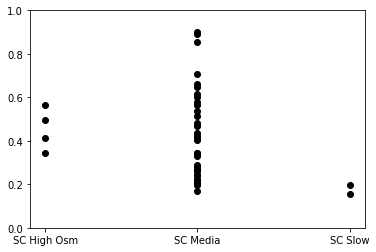

In [11]:
make_plot("XNOR")

In [12]:
conditions2=['media', 'inc_temp', 'od']
circuit_score_df_prod_inc = circuit_score_df_prod.groupby(conditions2+['gate'])[correctness_col].agg(np.mean).reset_index()
HTML(circuit_score_df_prod_inc.to_html(index=False))


media,inc_temp,od,gate,mean_correct_classifier_live
SC High Osm,30.0,0.00020,AND,0.782496
SC High Osm,30.0,0.00020,NAND,0.047124
SC High Osm,30.0,0.00020,NOR,0.015105
SC High Osm,30.0,0.00020,XNOR,0.564789
SC High Osm,30.0,0.00020,XOR,0.007845
SC High Osm,30.0,0.00085,AND,0.610270
SC High Osm,30.0,0.00085,NAND,0.079312
SC High Osm,30.0,0.00085,NOR,0.021037
SC High Osm,30.0,0.00085,XNOR,0.496675
SC High Osm,30.0,0.00085,XOR,0.006997


In [13]:
conditions3=['media', 'od']
circuit_score_df_prod_inc_temp = circuit_score_df_prod_inc.groupby(conditions3+['gate'])[correctness_col].agg(np.mean).reset_index()
HTML(circuit_score_df_prod_inc_temp.to_html(index=False))

media,od,gate,mean_correct_classifier_live
SC High Osm,0.00020,AND,0.777670
SC High Osm,0.00020,NAND,0.296592
SC High Osm,0.00020,NOR,0.382573
SC High Osm,0.00020,OR,0.001317
SC High Osm,0.00020,XNOR,0.489049
SC High Osm,0.00020,XOR,0.255153
SC High Osm,0.00085,AND,0.648170
SC High Osm,0.00085,NAND,0.279652
SC High Osm,0.00085,NOR,0.350526
SC High Osm,0.00085,OR,0.002802


In [14]:
def print_od_media_table(circuit):
    temp_df = circuit_score_df_prod_inc_temp.loc[circuit_score_df_prod_inc_temp['gate'] == circuit]
    print("\n{}\n".format(circuit))
    return temp_df.pivot_table(index="media", columns='od', values=correctness_col)


    

In [15]:
print_od_media_table("AND")


AND



od,5e-05,0.0002,0.0005,0.00085,0.00305,0.50255
media,,,,,,
SC High Osm,NaN,0.777670,NaN,0.648170,NaN,NaN
SC Media,0.714152,0.585273,0.630609,0.567883,0.5899,0.677844
SC Slow,NaN,0.445034,NaN,0.452238,NaN,NaN


In [16]:
print_od_media_table("NAND")


NAND



od,5e-05,0.0002,0.0005,0.00085,0.00305,0.50255
media,,,,,,
SC High Osm,NaN,0.296592,NaN,0.279652,NaN,NaN
SC Media,0.486467,0.336644,0.417231,0.286168,0.21845,0.075327
SC Slow,NaN,0.114426,NaN,0.133367,NaN,NaN


In [17]:
print_od_media_table("OR")


OR



od,5e-05,0.0002,0.0005,0.00085,0.00305,0.50255
media,,,,,,
SC High Osm,NaN,0.001317,NaN,0.002802,NaN,NaN
SC Media,0.009813,0.005794,0.001282,0.006903,0.002077,0.000056
SC Slow,NaN,0.006347,NaN,0.006633,NaN,NaN


In [18]:
print_od_media_table("NOR")


NOR



od,5e-05,0.0002,0.0005,0.00085,0.00305,0.50255
media,,,,,,
SC High Osm,NaN,0.382573,NaN,0.350526,NaN,NaN
SC Media,0.445807,0.454120,0.408902,0.564537,0.381645,0.051494
SC Slow,NaN,0.583849,NaN,0.560520,NaN,NaN


In [19]:
print_od_media_table("XOR")


XOR



od,5e-05,0.0002,0.0005,0.00085,0.00305,0.50255
media,,,,,,
SC High Osm,NaN,0.255153,NaN,0.132331,NaN,NaN
SC Media,0.292154,0.234294,0.135408,0.206203,0.126388,0.000132
SC Slow,NaN,0.226001,NaN,0.134304,NaN,NaN


In [20]:
print_od_media_table("XNOR")


XNOR



od,5e-05,0.0002,0.0005,0.00085,0.00305,0.50255
media,,,,,,
SC High Osm,NaN,0.489049,NaN,0.420469,NaN,NaN
SC Media,0.502842,0.445962,0.416064,0.369778,0.330036,0.467243
SC Slow,NaN,0.197979,NaN,0.154716,NaN,NaN


In [21]:
circuit_score_df_prod_media_only = circuit_score_df_prod_inc_temp.groupby(['media','gate'])[correctness_col].agg(np.mean).reset_index()
circuit_score_df_prod_media_only.sort_values(by=[correctness_col])
HTML(circuit_score_df_prod_media_only.sort_values(by=[correctness_col],ascending=False).to_html(index=False))

media,gate,mean_correct_classifier_live
SC High Osm,AND,0.712920
SC Media,AND,0.627610
SC Slow,NOR,0.572185
SC High Osm,XNOR,0.454759
SC Slow,AND,0.448636
SC Media,XNOR,0.421987
SC Media,NOR,0.384418
SC High Osm,NOR,0.366549
SC Media,NAND,0.303381
SC High Osm,NAND,0.288122


In [22]:
HTML(circuit_score_df_prod_media_only.sort_values(by=["gate",correctness_col]).to_html(index=False))


media,gate,mean_correct_classifier_live
SC Slow,AND,0.448636
SC Media,AND,0.627610
SC High Osm,AND,0.712920
SC Slow,NAND,0.123896
SC High Osm,NAND,0.288122
SC Media,NAND,0.303381
SC High Osm,NOR,0.366549
SC Media,NOR,0.384418
SC Slow,NOR,0.572185
SC High Osm,OR,0.002059


In [23]:
HTML(circuit_score_df_prod_media_only.sort_values(by=["media",correctness_col],ascending=False).to_html(index=False))


media,gate,mean_correct_classifier_live
SC Slow,NOR,0.572185
SC Slow,AND,0.448636
SC Slow,XOR,0.180153
SC Slow,XNOR,0.176348
SC Slow,NAND,0.123896
SC Slow,OR,0.006490
SC Media,AND,0.627610
SC Media,XNOR,0.421987
SC Media,NOR,0.384418
SC Media,NAND,0.303381


In [24]:
overall_circuit_score_df_prod = circuit_score_df_prod_media_only.groupby(['gate'])[correctness_col].agg(np.mean).reset_index()
HTML(overall_circuit_score_df_prod.sort_values(by=[correctness_col],ascending=False).to_html(index=False))


gate,mean_correct_classifier_live
AND,0.596389
NOR,0.441050
XNOR,0.351031
NAND,0.238466
XOR,0.179886
OR,0.004290


In [25]:
# Dan's robustness score based on std
# Robustness is the std deviation of the score across all conditions after aggregation
circuit_robustness_df = circuit_score_df_prod_media_only.groupby(['gate'])[correctness_col].agg(np.std).reset_index()
circuit_robustness_df.loc[:, 'reproducibility'] = circuit_robustness_df.apply(lambda x: 1.0- x[correctness_col], axis=1)
circuit_robustness_df = circuit_robustness_df.drop(columns=[correctness_col])
HTML(circuit_robustness_df.sort_values(by=['reproducibility'],ascending=False).to_html(index=False))


gate,reproducibility
OR,0.997784
XOR,0.986009
NAND,0.900487
NOR,0.886084
AND,0.865120
XNOR,0.847835
